<a href="https://colab.research.google.com/github/ThaliSouza2017/data-science/blob/master/PyLadies_ML_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORKSHOP INTRODUÇÃO À MACHINE LEARNING**

**Autoria**: Lilianne M. I. Nakazono | **Organização**: Pyladies SP | **Local**: FIAP Paulista <br>


---



Olá meninas!

Hoje iremos usar (principalmente) os seguintes pacotes:
* [Pandas](https://pandas.pydata.org/) - Leitura a manipulação de dados tabulares 
* [Seaborn](https://seaborn.pydata.org/) - Visualização de dados 
* [Sklearn](https://scikit-learn.org/stable/index.html) - Algoritmos de aprendizado de máquina


Este arquivo já contém alguns códigos pra facilitar a vida. Rodem todas as células antes de começar a escrever seu próprio código.




# 1. Bibliotecas

In [0]:
# Importando bibliotecas:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

# 2. Funções

In [0]:
# Definindo funções:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 3. Leitura de dados

## Iris dataset

In [0]:
#puxando o data set
target = pd.DataFrame(datasets.load_iris().target, columns=['target'])
iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names) 

# 4. Pré-análise dos dados

In [0]:
target
iris

In [45]:
#cabeçalho do dataset
iris.head()
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [28]:
#nome das colunas
list(iris)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
#alterando nome das colunas
iris.columns = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width']
iris.head()


,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
#tipagem das colunas
iris.dtypes

sepal_lenght    float64
sepal_width     float64
petal_lenght    float64
petal_width     float64
dtype: object

In [0]:
#checagem e agrupamento de dados faltante
iris.isna().sum()
iris = iris.dropna()

In [32]:
#descrevendo quartis, media, count,desvio padrao, min, max do dataset
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_lenght,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [33]:
#encontrando a media de uma coluna especifica
iris.sepal_lenght.mean()

5.843333333333335

In [36]:
#similar ao iris.head(), selecionando as colunas por index
iris.iloc[0:5, :]

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


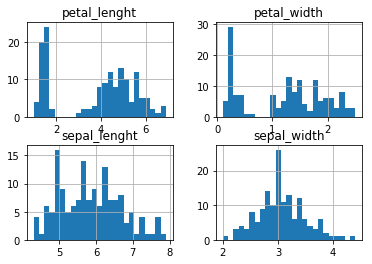

In [43]:
#histograma
iris.hist(bins = 25)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


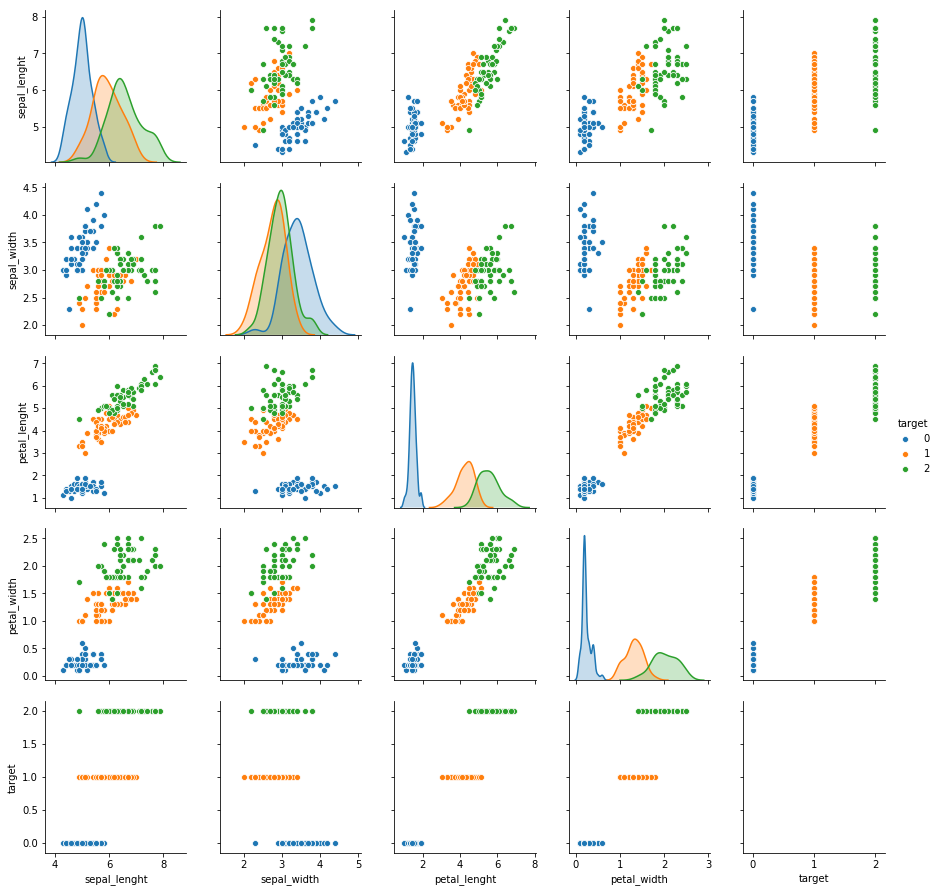

In [44]:
#começando a utilizar o seaborn, separando o data set por classe de atributo
data = pd.concat([iris, target], axis=1)
sns.pairplot(data, hue = 'target')

In [0]:
#retirando dados (erros) da tabela
iris_2 = iris.query('sepal_lenght>1 & sepal_width>1 & petal_lenght>1 & petal_width>1')
print(iris_2)

In [53]:
#acessando dados por posição ou por linha
iris_2.loc[50:52, :] #ou
iris_2.iloc[0:3,] #acessando a mesma porção de dados

,sepal_lenght,sepal_width,petal_lenght,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [56]:
#filtrando colunas específicas e armazenando em uma nova tabela
petal = iris[['petal_lenght', 'petal_width']]
petal.head()

,petal_lenght,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [57]:
#correlação: variação entre -1 e +1, sendo -1 negativamente correlacionada e +1 positivamente correlacionadas
iris.corr()

,sepal_lenght,sepal_width,petal_lenght,petal_width
sepal_lenght,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_lenght,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Imprimir tabela: 

> `print(iris)`

Contagem de linhas para um certo atributo:

> `iris.atributo.value_counts()`


Tipo dos atributos:

> `iris.dtypes`

Nome dos atributos (colunas):

> `list(iris)`

Estatísticas:

> `iris.describe().T`

Média de um atributo:

> `iris.atributo.mean()`

Desvio padrão de um atributo:

> `iris.atributo.std()`

Concatenar linhas/colunas:

> `iris.concat()`

Checar se tem NaNs:

> `iris.isna().sum()`

Remover NaNs:

> `iris.dropna()`

Acessar todas as colunas da linha em posição i: 

> `iris.iloc[i,:]`

Acessar todas as colunas da linha de índice i:

> `iris.loc[i,:]`

Filtrando tabela:

> `iris.query('condição1 & condição2')`


> `iris[(condição1) & (condição2)]`

Histograma:

> `iris.hist()`

Pairplot: 

> `sns.pairplot(data, hue="target")` <br> # data contém uma coluna chamada target com as classes

Matriz de correlação:

> `iris.corr()`

Visualização matriz de correlação:
> `sns.heatmap(iris.corr(), cmap='bwr', vmax=1, vmin=-1,center=0, square=True, annot=True)`


# 5. Amostragem para validação cruzada

Criando amostra de treinamento (70%) e de teste (30%):
> `X_train, X_test, y_train, y_test = train_test_split(iris, target,  test_size=0.3, random_state=42)`

Para fazer uma amostragem estratificada, adicionar o parâmetro:

> `stratify = target`

# 6. Validação de modelo

## Algoritmos:

Eu recomendo fortemente que vocês procurem a documentação de cada algoritmo e deem uma lida nos parâmetros pedidos de cada um! 

k-Nearest Neighbors: 

> `clf = KNeighborsClassifier()`

Support Vector Machine:

> `clf = SVC()`

Decision Tree:

> `clf = DecisionTreeClassifier()`

Random Forest: 

> `clf = RandomForestClassifier()`

## Treinamento do modelo:

> `clf.fit(X_train, y_train.values.ravel())`

## Teste:

> `y_pred = clf.predict(X_test)`

## Matriz de confusão: 
> `matrix = confusion_matrix(y_test, y_pred)`

> `fig = plot_confusion_matrix(matrix, classes=['0','1', '2'])`

## Métricas de performance:

> `metrics.classification_report(y_test, y_pred)`
